# Deep Learning for Business: Customer Shopping Preferences

## Introduction

### Business Problem and Significance
The business problem addressed in this project is understanding and predicting customer shopping preferences to enhance business decision-making. This is significant as it can help businesses tailor their products, marketing strategies, and overall customer experience to better meet customer needs.

### Project Goals and Objectives
The goal of this project is to develop predictive models using deep learning to forecast customer purchase behaviors and trends. The specific objectives include:
1. Preprocessing the data to handle missing values, encode categorical variables, and scale numerical features.
2. Experimenting with various deep learning architectures, including Recurrent Neural Networks (RNN), Convolutional Neural Networks (CNN), Bidirectional RNNs, and pretrained-inspired models.
3. Fine-tuning the models to optimize their performance.
4. Evaluating the models using appropriate metrics to determine their effectiveness in predicting customer shopping trends.

### Benefits to the Business
The outcomes of this project will enable businesses to make informed decisions based on data-driven insights. By accurately predicting customer purchase behaviors, businesses can:
- Optimize their inventory management to reduce overstock and stockouts.
- Improve personalized marketing strategies, resulting in higher customer engagement and conversion rates.
- Enhance customer relationship management by understanding customer preferences and providing tailored experiences.

### Implications on Decision-Making Processes
The predictive models developed in this project will provide valuable insights that can influence various business decisions, such as:
- **Inventory Management:** By predicting which products are likely to be in high demand, businesses can adjust their inventory levels accordingly.
- **Marketing Strategies:** Insights into customer preferences can help design more effective marketing campaigns, targeting the right customers with the right products.
- **Customer Relationship Management:** Understanding customer behavior patterns allows businesses to personalize their interactions with customers, leading to increased customer loyalty and satisfaction.

### Dataset Source
The dataset used in this project is sourced from Kaggle, titled "Customer Shopping Trends Dataset" provided by Sourav Banerjee. This dataset contains updated information on customer shopping trends, including various attributes related to customer demographics, purchase behaviors, and product details. The dataset can be accessed [here](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv). This dataset is crucial for developing and training the predictive models to achieve the project's objectives.


# Step 2: Describing Dataset

Dataset Dimensions: (3900, 19)
Missing Values:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Descriptive Statistics:
         Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean

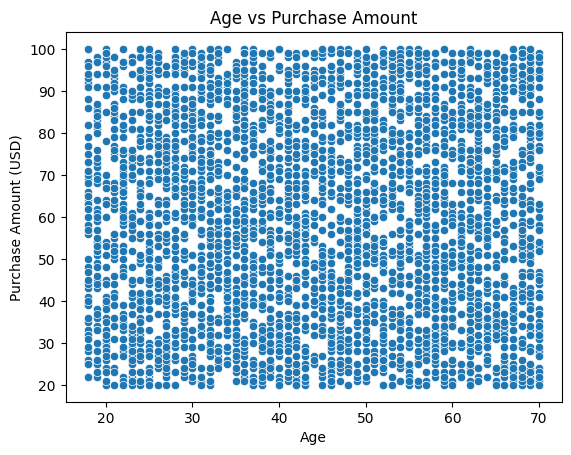

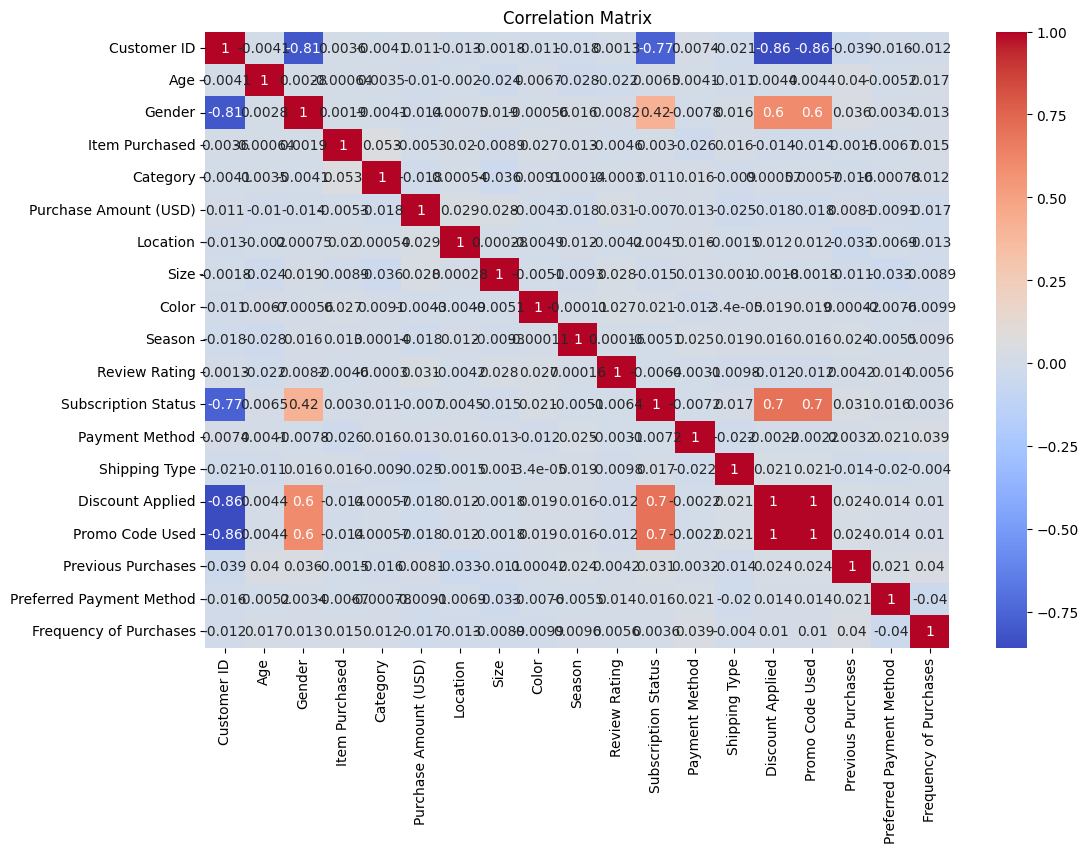

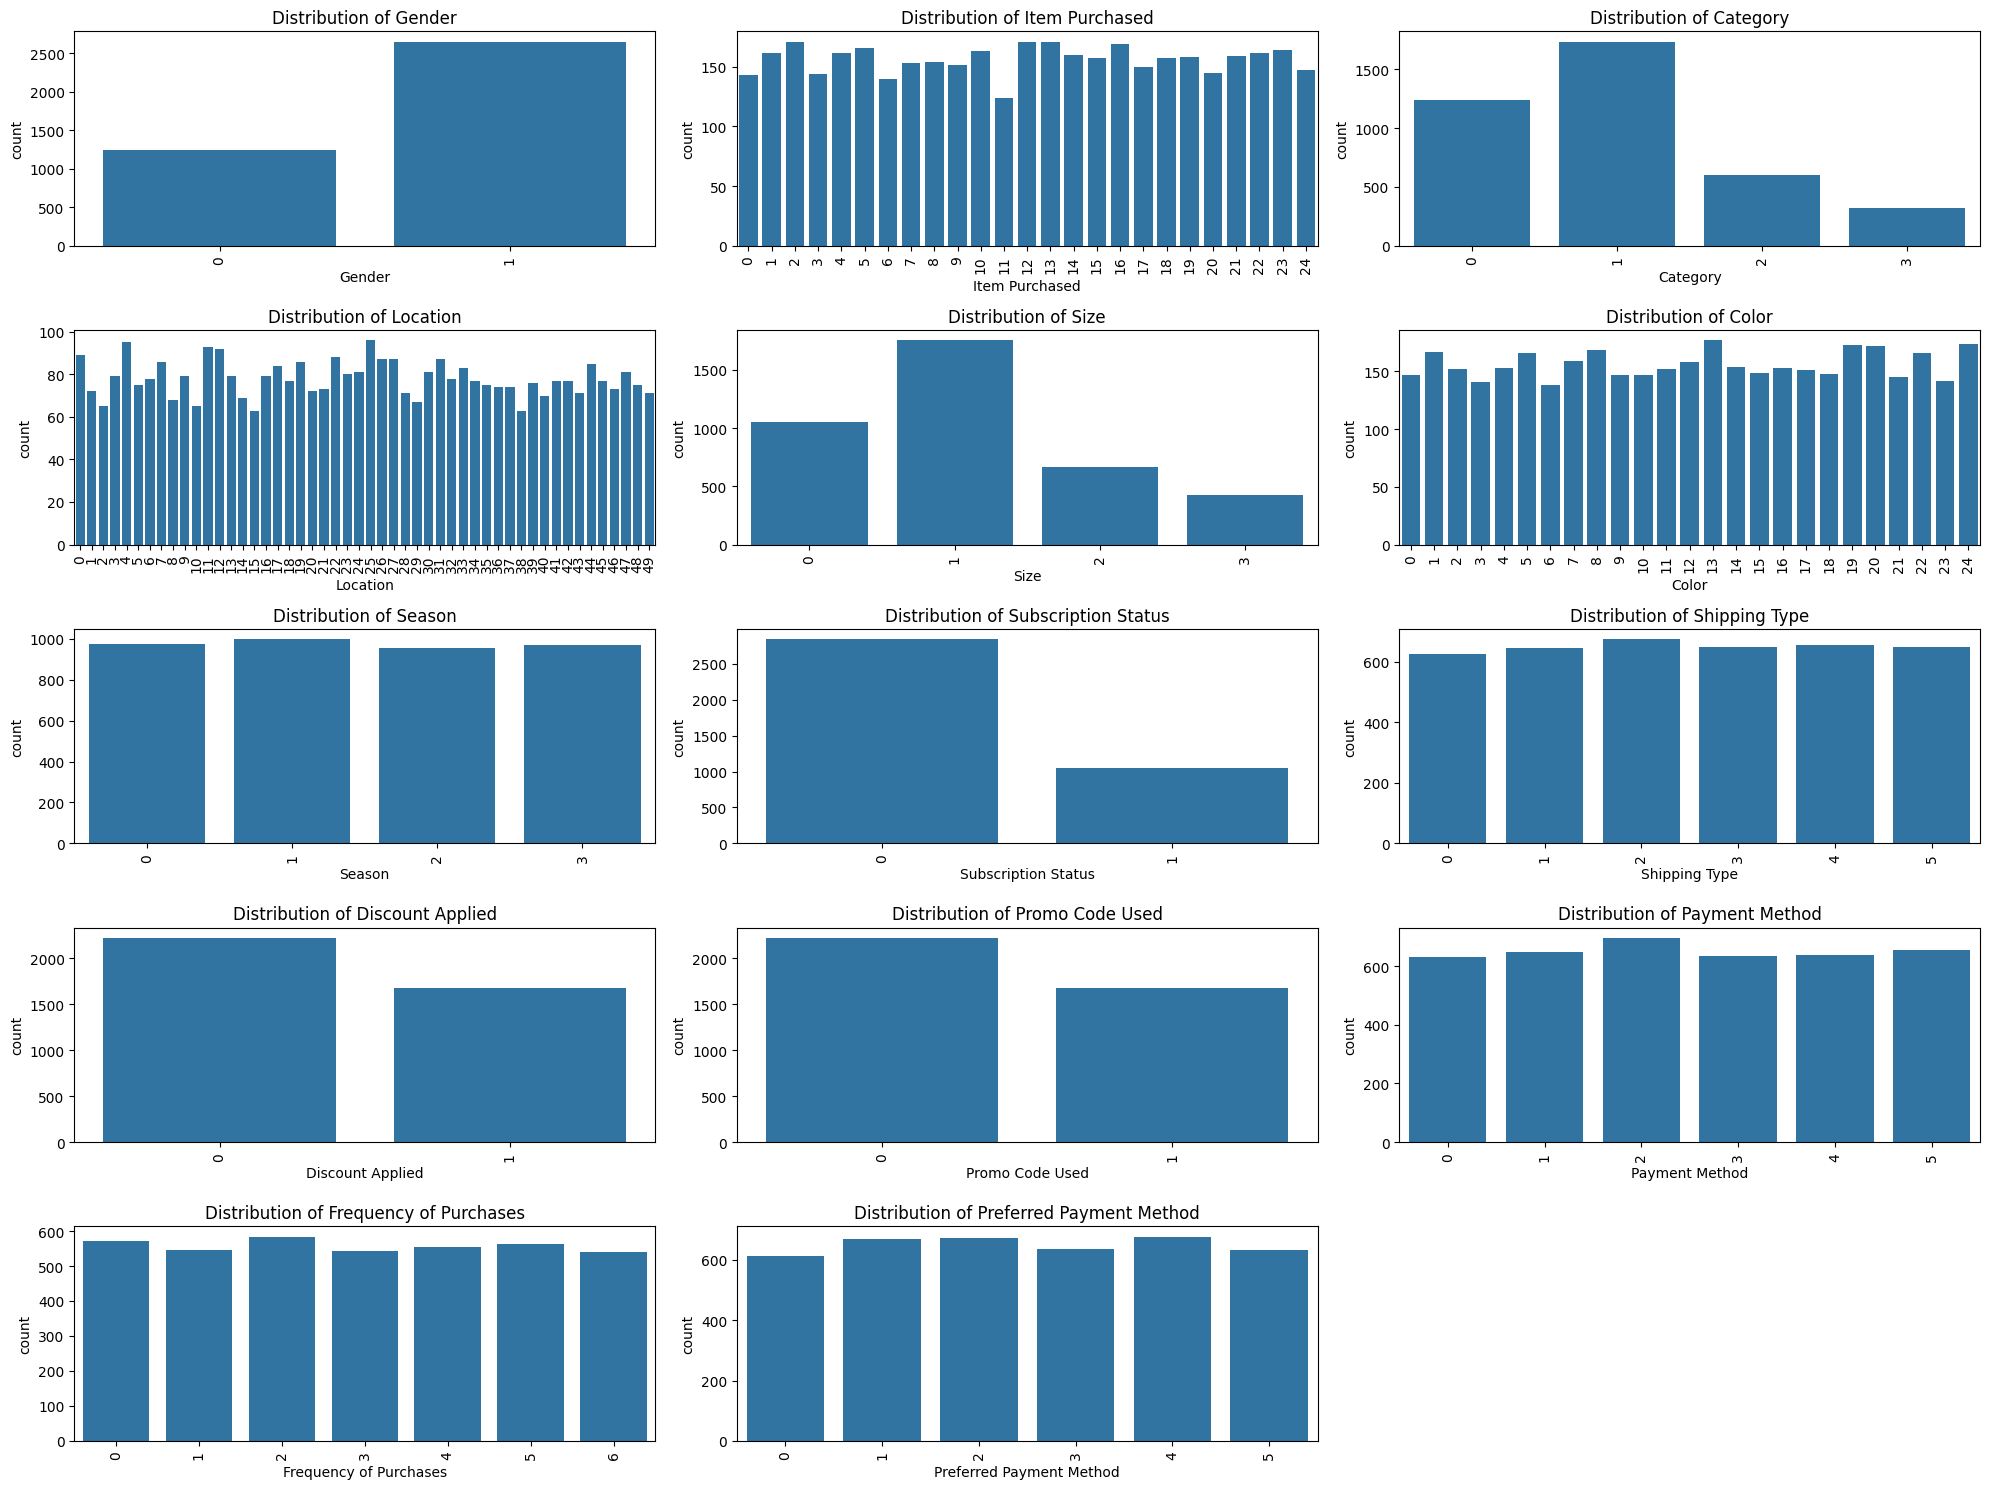

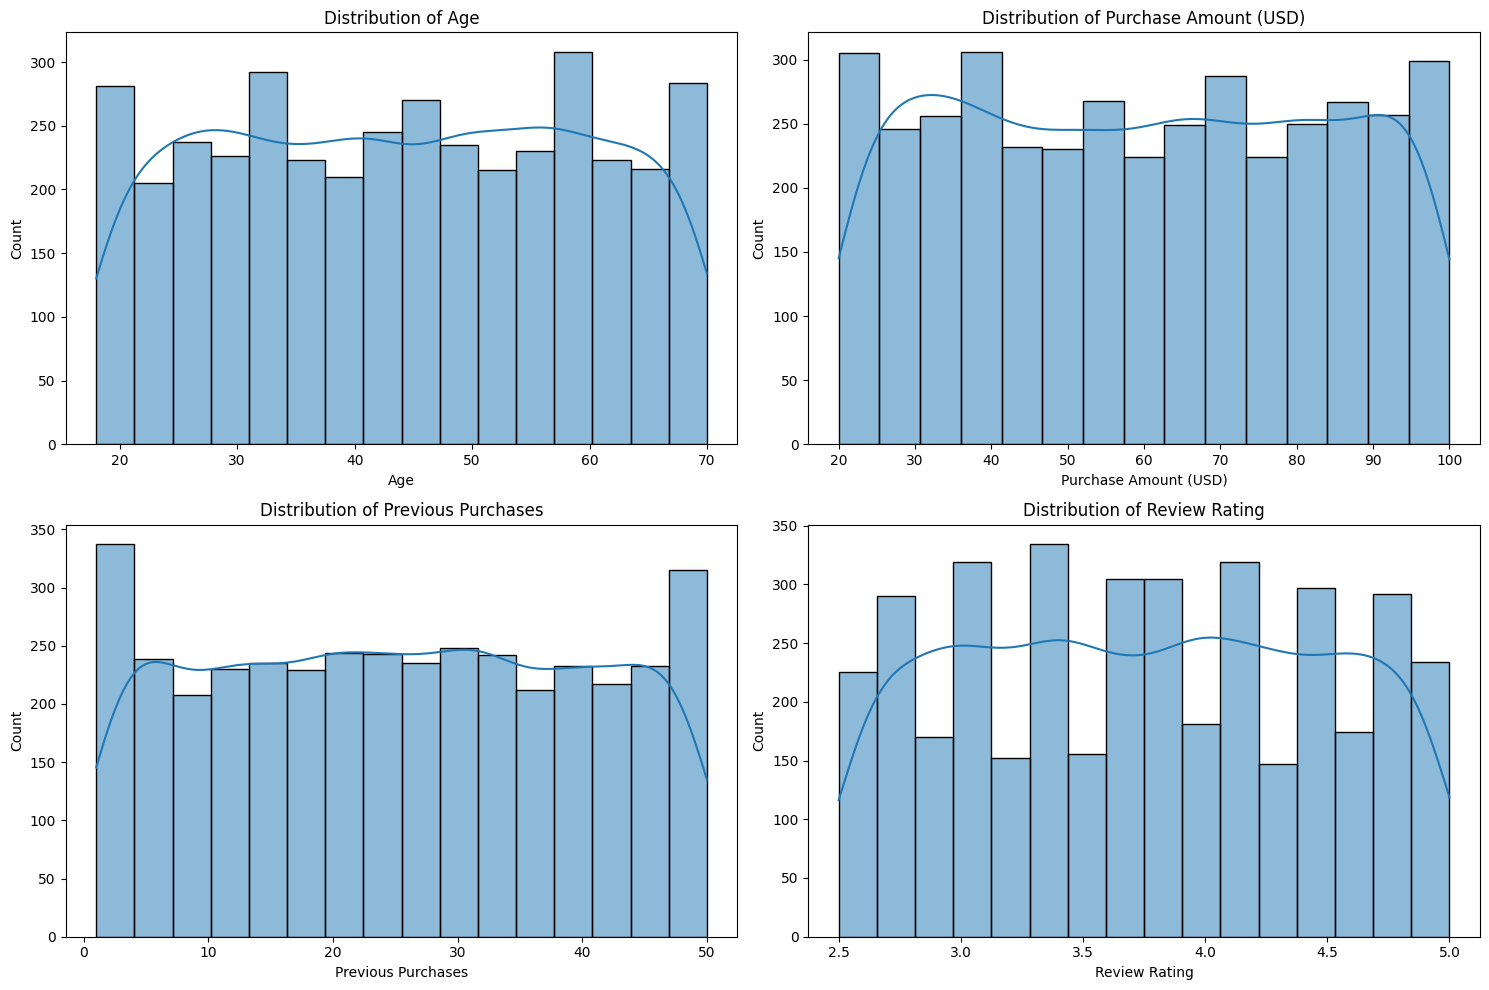

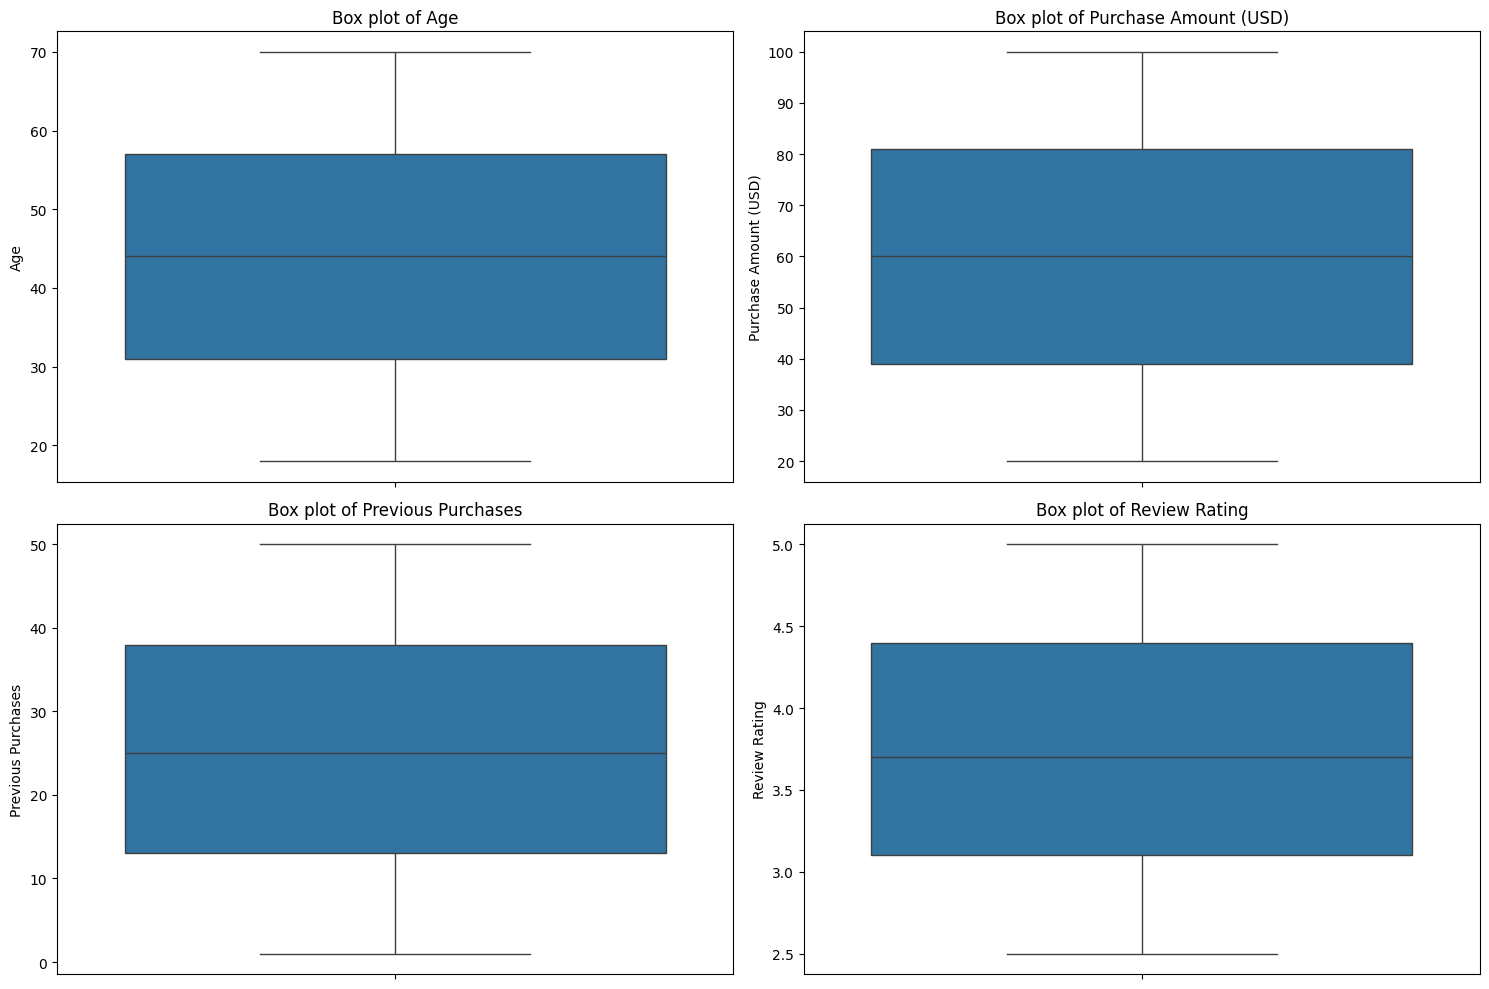

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/shopping_trends.csv')

# Determine the dimensions of the dataset
print(f"Dataset Dimensions: {df.shape}")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Descriptive statistics
descriptive_stats = df.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)

# Visualize the data
# Scatter plot for age vs purchase amount
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title('Age vs Purchase Amount')
plt.show()

# Encode categorical variables before calculating correlation matrix
label_encoders = {}
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                       'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
                       'Payment Method', 'Frequency of Purchases', 'Preferred Payment Method']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Correlation plot
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bar plots for categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution plots for numerical features
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


# Step 3: Data Preprocessing

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Handle missing values by filling with forward fill method
df.fillna(method='ffill', inplace=True)

# Encoding categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling for numerical columns
scaler = StandardScaler()
df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']] = scaler.fit_transform(df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']])

# Prepare numerical features
X_numerical = df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']].values
y = df['Review Rating'].values

# Display preprocessed data
print(df.head())
print(X_numerical.shape, y.shape)


   Customer ID       Age  Gender  Item Purchased  Category  \
0            1  0.718913       1               2         1   
1            2 -1.648629       1              23         1   
2            3  0.390088       1              11         1   
3            4 -1.517099       1              14         2   
4            5  0.061263       1               2         1   

   Purchase Amount (USD)  Location  Size  Color  Season  Review Rating  \
0              -0.285629        16     0      7       3            3.1   
1               0.178852        18     0     12       3            3.1   
2               0.558882        20     2     12       1            3.1   
3               1.276716        38     1     12       1            3.5   
4              -0.454531        36     1     21       1            2.7   

   Subscription Status  Payment Method  Shipping Type  Discount Applied  \
0                    1               2              1                 1   
1                    1          

#Step 4: Fitting Different Deep Learning Architectures


Imports and Data Preparation

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, LSTM, SimpleRNN, Conv1D, MaxPooling1D, Bidirectional
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('shopping_trends.csv')

# Handle missing values by filling with forward fill method
df.fillna(method='ffill', inplace=True)

# Encoding categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                       'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied',
                       'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling for numerical columns
scaler = StandardScaler()
df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']] = scaler.fit_transform(df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']])

# Prepare numerical features and target variable
X_numerical = df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']].values
y = df['Review Rating'].values

# Split data into training and testing sets
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

# Split categorical data
X_train_cat = [df[col].values[:X_train_num.shape[0]] for col in categorical_columns]
X_test_cat = [df[col].values[X_train_num.shape[0]:] for col in categorical_columns]

X_train = [X_train_num] + [np.array(cat) for cat in X_train_cat]
X_test = [X_test_num] + [np.array(cat) for cat in X_test_cat]

# Define the MAPE metric
def mape(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

# Define embedding input layers for categorical features
def create_embedding_layers(input_data, categorical_columns, embedding_dim=8):
    inputs = []
    embeddings = []
    for col in categorical_columns:
        vocab_size = input_data[col].nunique()
        input_layer = Input(shape=(1,), name=f'{col}_input')
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1)(input_layer)
        flatten_layer = Flatten()(embedding_layer)
        inputs.append(input_layer)
        embeddings.append(flatten_layer)
    return inputs, embeddings

# Plot training and validation loss
def plot_history(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
# Prepare data inputs for the model
numerical_input_data = X_numerical
categorical_input_data = [df[col].values for col in categorical_columns]


Simple Neural Network with Embeddings




Epoch 1/50
78/78 [==============================] - 3s 9ms/step - loss: 3.6805 - mape: 39.4027 - val_loss: 0.7098 - val_mape: 18.3785 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 1s 8ms/step - loss: 0.5952 - mape: 18.1513 - val_loss: 0.6197 - val_mape: 17.4886 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 1s 7ms/step - loss: 0.5330 - mape: 17.3712 - val_loss: 0.5562 - val_mape: 18.0847 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 1s 8ms/step - loss: 0.5104 - mape: 17.0898 - val_loss: 0.6024 - val_mape: 17.5259 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 1s 10ms/step - loss: 0.5091 - mape: 17.0075 - val_loss: 0.5476 - val_mape: 17.4030 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 1s 8ms/step - loss: 0.4908 - mape: 16.7431 - val_loss: 0.5650 - val_mape: 17.6689 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 1s 11ms/step - loss: 0.4859 - mape: 16.7069 - val_loss: 0.5605 - 

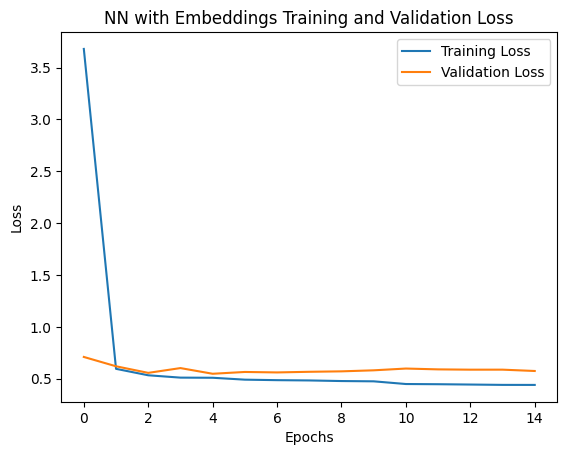

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Simple Neural Network with Embeddings and Improvements
def create_nn_model_with_embeddings(input_data, embedding_dim=8):
    numerical_input = Input(shape=(X_numerical.shape[1],))
    inputs, embeddings = create_embedding_layers(input_data, categorical_columns, embedding_dim)
    merged_embeddings = Concatenate()(embeddings)
    merged_inputs = Concatenate()([numerical_input, merged_embeddings])
    x = Dense(128, activation='relu')(merged_inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    output = Dense(1)(x)
    model = Model(inputs=[numerical_input] + inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=[mape])
    return model

# Create and train the model with early stopping and learning rate reduction
nn_model_with_embeddings = create_nn_model_with_embeddings(df)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
nn_history = nn_model_with_embeddings.fit(
    [X_train_num] + X_train_cat, y_train, epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)
nn_loss, nn_mape = nn_model_with_embeddings.evaluate([X_test_num] + X_test_cat, y_test)
print(f"NN with Embeddings Mean Absolute Percentage Error: {nn_mape}")

# Plot training and validation loss for NN with Embeddings
plot_history(nn_history, 'NN with Embeddings Training and Validation Loss')


Recurrent Neural Network (RNN) with Embeddings

Epoch 1/50
78/78 [==============================] - 9s 35ms/step - loss: 6.5109 - mape: 55.5365 - val_loss: 0.5723 - val_mape: 17.5965 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 2s 22ms/step - loss: 0.5112 - mape: 17.3638 - val_loss: 0.5827 - val_mape: 17.5029 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 3s 44ms/step - loss: 0.5030 - mape: 17.1216 - val_loss: 0.6489 - val_mape: 17.7247 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 2s 27ms/step - loss: 0.4963 - mape: 16.9237 - val_loss: 0.5750 - val_mape: 17.6821 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 1s 12ms/step - loss: 0.5033 - mape: 17.0506 - val_loss: 0.6629 - val_mape: 17.8683 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 1s 13ms/step - loss: 0.4991 - mape: 16.9545 - val_loss: 0.6724 - val_mape: 17.9255 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 1s 12ms/step - loss: 0.4828 - mape: 16.7123 - val_loss: 0.62

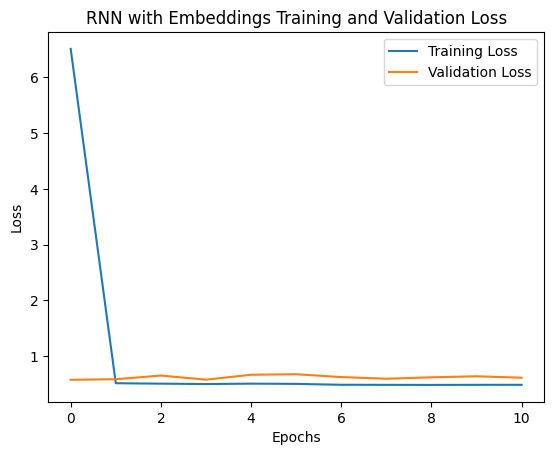

In [7]:
# Recurrent Neural Network with Embeddings and Improvements
def create_rnn_model_with_embeddings(input_data, embedding_dim=8):
    numerical_input = Input(shape=(X_numerical.shape[1],))
    inputs, embeddings = create_embedding_layers(input_data, categorical_columns, embedding_dim)
    merged_embeddings = Concatenate()(embeddings)
    merged_inputs = Concatenate()([numerical_input, merged_embeddings])
    x = tf.expand_dims(merged_inputs, axis=1)
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64)(x)
    x = Dense(32, activation='relu')(x)
    output = Dense(1)(x)
    model = Model(inputs=[numerical_input] + inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=[mape])
    return model

# Create and train the RNN model with early stopping and learning rate reduction
rnn_model_with_embeddings = create_rnn_model_with_embeddings(df)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
rnn_history = rnn_model_with_embeddings.fit(
    [X_train_num] + X_train_cat, y_train, epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)
rnn_loss, rnn_mape = rnn_model_with_embeddings.evaluate([X_test_num] + X_test_cat, y_test)
print(f"RNN with Embeddings Mean Absolute Percentage Error: {rnn_mape}")

# Plot training and validation loss for RNN with Embeddings
plot_history(rnn_history, 'RNN with Embeddings Training and Validation Loss')


Convolutional Neural Network (CNN) with Embeddings

Epoch 1/50
78/78 [==============================] - 6s 27ms/step - loss: 2.3210 - mape: 30.4766 - val_loss: 0.5638 - val_mape: 18.1505 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 1s 14ms/step - loss: 0.5407 - mape: 17.5640 - val_loss: 0.5458 - val_mape: 18.1235 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 1s 15ms/step - loss: 0.5158 - mape: 17.2594 - val_loss: 0.5810 - val_mape: 17.2989 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 1s 15ms/step - loss: 0.5130 - mape: 17.1466 - val_loss: 0.5287 - val_mape: 17.6574 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 1s 14ms/step - loss: 0.4981 - mape: 17.0324 - val_loss: 0.5855 - val_mape: 17.3440 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 1s 15ms/step - loss: 0.5080 - mape: 17.0912 - val_loss: 0.5492 - val_mape: 17.3688 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 2s 22ms/step - loss: 0.4999 - mape: 17.0200 - val_loss: 0.53

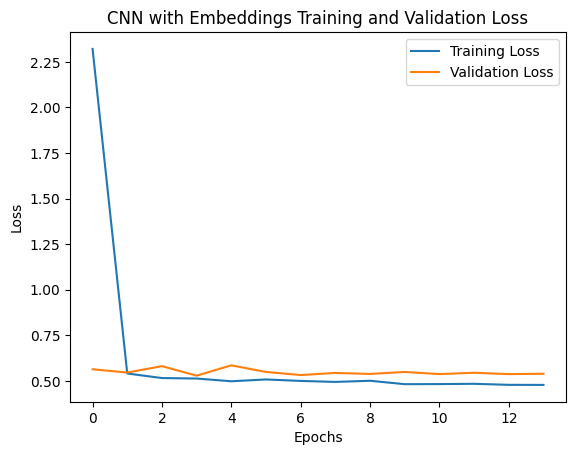

In [8]:
# Convolutional Neural Network with Embeddings and Improvements
def create_cnn_model_with_embeddings(input_data, embedding_dim=8):
    numerical_input = Input(shape=(X_numerical.shape[1],))
    inputs, embeddings = create_embedding_layers(input_data, categorical_columns, embedding_dim)
    merged_embeddings = Concatenate()(embeddings)
    merged_inputs = Concatenate()([numerical_input, merged_embeddings])
    x = tf.expand_dims(merged_inputs, axis=2)
    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    output = Dense(1)(x)
    model = Model(inputs=[numerical_input] + inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=[mape])
    return model

# Create and train the CNN model with early stopping and learning rate reduction
cnn_model_with_embeddings = create_cnn_model_with_embeddings(df)
cnn_history = cnn_model_with_embeddings.fit(
    [X_train_num] + X_train_cat, y_train, epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)
cnn_loss, cnn_mape = cnn_model_with_embeddings.evaluate([X_test_num] + X_test_cat, y_test)
print(f"CNN with Embeddings Mean Absolute Percentage Error: {cnn_mape}")

# Plot training and validation loss for CNN with Embeddings
plot_history(cnn_history, 'CNN with Embeddings Training and Validation Loss')


Bidirectional Recurrent Neural Network (BiRNN) with Embeddings

Epoch 1/50
78/78 [==============================] - 13s 45ms/step - loss: 4.8589 - mape: 45.6719 - val_loss: 0.6680 - val_mape: 17.8866 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 2s 26ms/step - loss: 0.5144 - mape: 17.2803 - val_loss: 0.5795 - val_mape: 17.7173 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 2s 23ms/step - loss: 0.5077 - mape: 17.2120 - val_loss: 0.6086 - val_mape: 17.7182 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 1s 17ms/step - loss: 0.4995 - mape: 16.9280 - val_loss: 0.6708 - val_mape: 17.8399 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 1s 16ms/step - loss: 0.5018 - mape: 16.9503 - val_loss: 0.6678 - val_mape: 17.9324 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 1s 15ms/step - loss: 0.5048 - mape: 17.0493 - val_loss: 0.6907 - val_mape: 17.9676 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 1s 15ms/step - loss: 0.4962 - mape: 16.8654 - val_loss: 0.5

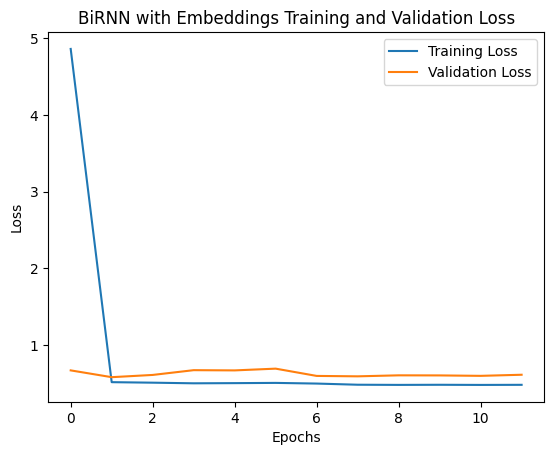

In [9]:
# Bidirectional RNN with Embeddings and Improvements
def create_birnn_model_with_embeddings(input_data, embedding_dim=8):
    numerical_input = Input(shape=(X_numerical.shape[1],))
    inputs, embeddings = create_embedding_layers(input_data, categorical_columns, embedding_dim)
    merged_embeddings = Concatenate()(embeddings)
    merged_inputs = Concatenate()([numerical_input, merged_embeddings])
    x = tf.expand_dims(merged_inputs, axis=1)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)
    x = Dense(32, activation='relu')(x)
    output = Dense(1)(x)
    model = Model(inputs=[numerical_input] + inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=[mape])
    return model

# Create and train the BiRNN model with early stopping and learning rate reduction
birnn_model_with_embeddings = create_birnn_model_with_embeddings(df)
birnn_history = birnn_model_with_embeddings.fit(
    [X_train_num] + X_train_cat, y_train, epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)
birnn_loss, birnn_mape = birnn_model_with_embeddings.evaluate([X_test_num] + X_test_cat, y_test)
print(f"BiRNN with Embeddings Mean Absolute Percentage Error: {birnn_mape}")

# Plot training and validation loss for BiRNN with Embeddings
plot_history(birnn_history, 'BiRNN with Embeddings Training and Validation Loss')


Experiment with Pretrained DL Models

In [10]:
#Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Embedding
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define the MAPE metric using TensorFlow operations
def mape(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

# Define embedding input layers for categorical features
def create_embedding_layers(input_data, categorical_columns, embedding_dim=8):
    inputs = []
    embeddings = []
    for col in categorical_columns:
        vocab_size = input_data[col].nunique()
        input_layer = Input(shape=(1,))
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1)(input_layer)
        flatten_layer = Flatten()(embedding_layer)
        inputs.append(input_layer)
        embeddings.append(flatten_layer)
    return inputs, embeddings


Create and Train the Pretrained-Inspired Model

Epoch 1/50
78/78 [==============================] - 6s 12ms/step - loss: 3.1416 - mape: 36.2485 - val_loss: 0.7271 - val_mape: 18.8861 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 0s 6ms/step - loss: 0.5857 - mape: 18.0133 - val_loss: 0.6483 - val_mape: 17.9260 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 0s 5ms/step - loss: 0.5285 - mape: 17.3264 - val_loss: 0.7377 - val_mape: 18.3091 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 0s 5ms/step - loss: 0.5122 - mape: 17.0933 - val_loss: 0.5977 - val_mape: 17.8294 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 0s 5ms/step - loss: 0.4996 - mape: 16.8266 - val_loss: 0.6320 - val_mape: 17.8619 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 0s 5ms/step - loss: 0.4959 - mape: 16.7694 - val_loss: 0.6739 - val_mape: 18.0377 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.4950 - mape: 16.7565 - val_loss: 0.8223 - v

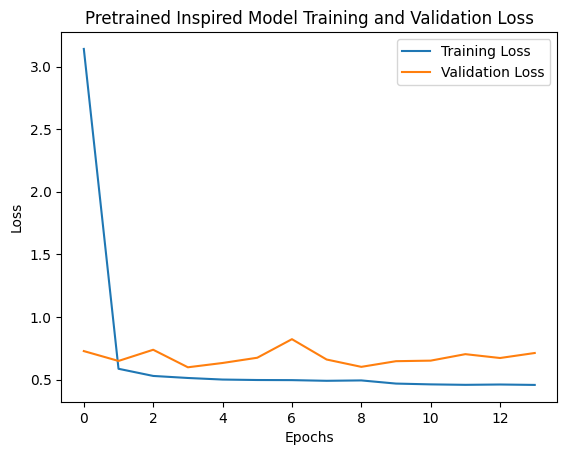

In [11]:
# Pretrained-Inspired Model
def create_pretrained_inspired_model(input_data, embedding_dim=8):
    numerical_input = Input(shape=(X_numerical.shape[1],))
    inputs, embeddings = create_embedding_layers(input_data, categorical_columns, embedding_dim)
    merged_embeddings = Concatenate()(embeddings)
    merged_inputs = Concatenate()([numerical_input, merged_embeddings])
    x = Dense(128, activation='relu')(merged_inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    output = Dense(1)(x)
    model = Model(inputs=[numerical_input] + inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=[mape])
    return model

# Prepare inputs for the model
numerical_input_data = X_numerical
categorical_input_data = [df[col].values for col in categorical_columns]

# Create and train the model
pretrained_model = create_pretrained_inspired_model(df)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
pretrained_history = pretrained_model.fit(
    [X_train_num] + X_train_cat, y_train, epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)
pretrained_loss, pretrained_mape = pretrained_model.evaluate([X_test_num] + X_test_cat, y_test)
print(f"Pretrained Inspired Model Mean Absolute Percentage Error: {pretrained_mape}")

# Plot training and validation loss for the pretrained-inspired model
def plot_history(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(pretrained_history, 'Pretrained Inspired Model Training and Validation Loss')


# Step 5 Evaluation of all models


Evaluation of All Models


NN with Embeddings Test MAPE: 17.984468460083008
RNN with Embeddings Test MAPE: 17.644874572753906
CNN with Embeddings Test MAPE: 18.384910583496094
BiRNN with Embeddings Test MAPE: 17.540119171142578
Pretrained Inspired Model Test MAPE: 17.72443199157715


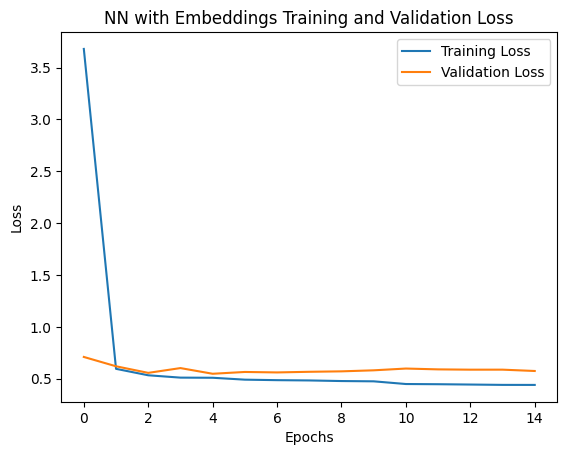

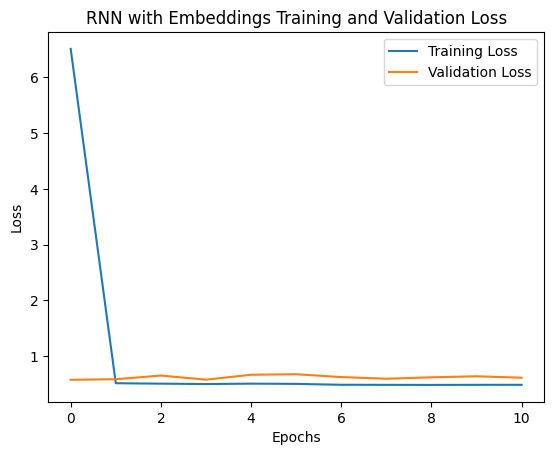

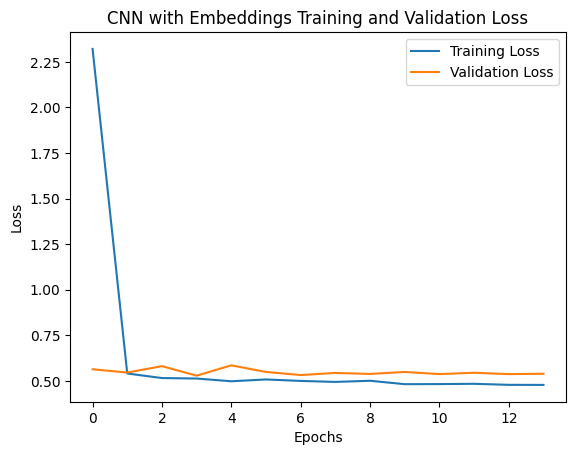

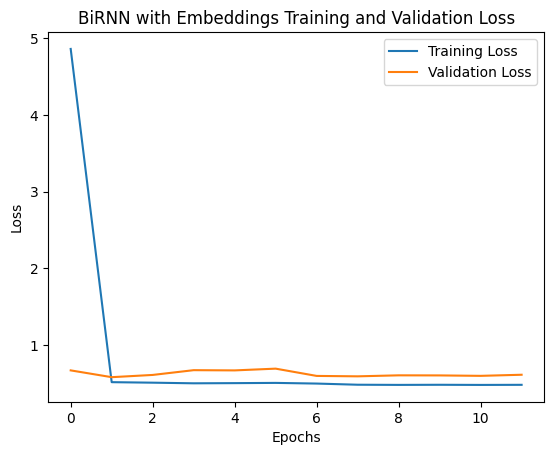

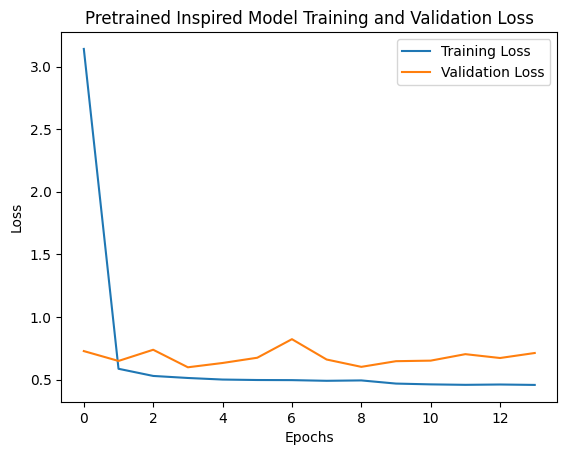

In [12]:
# Store results in a dictionary
results = {
    "NN with Embeddings": nn_mape,
    "RNN with Embeddings": rnn_mape,
    "CNN with Embeddings": cnn_mape,
    "BiRNN with Embeddings": birnn_mape,
    "Pretrained Inspired Model": pretrained_mape
}

# Display results
for model_name, mape_value in results.items():
    print(f"{model_name} Test MAPE: {mape_value}")

# Plot training and validation loss for each model
def plot_history(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(nn_history, 'NN with Embeddings Training and Validation Loss')
plot_history(rnn_history, 'RNN with Embeddings Training and Validation Loss')
plot_history(cnn_history, 'CNN with Embeddings Training and Validation Loss')
plot_history(birnn_history, 'BiRNN with Embeddings Training and Validation Loss')
plot_history(pretrained_history, 'Pretrained Inspired Model Training and Validation Loss')
